In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import torch
from torchvision import datasets, transforms
import os
from PIL import Image

# Define transforms for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resizing the images
    transforms.ToTensor() # Converting to tensor
])

# Loading the dataset
data_dir = '/content/drive/MyDrive/Newunzipt'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Get class names
class_names = dataset.classes
print(f"Classes: {class_names}")

# Initialize dictionary to store class-wise image counts and dimensions
class_info = {class_name: {'count': 0, 'dimensions': set()} for class_name in class_names}

# Iterate through the dataset to collect information
for img_path, class_idx in dataset.samples:
    class_name = class_names[class_idx]
    with Image.open(img_path) as img:
        original_size = img.size
        class_info[class_name]['count'] += 1
        class_info[class_name]['dimensions'].add(original_size)

# Display class information
for class_name, info in class_info.items():
    print(f"Class: {class_name}")
    print(f"  Number of images: {info['count']}")
    print(f"  Dimensions: {info['dimensions']}")


Classes: ['Hole or cut', 'Lines', 'Normal', 'Stain']
Class: Hole or cut
  Number of images: 106
  Dimensions: {(720, 1210), (720, 1280), (1200, 1600), (719, 1205), (720, 1176), (4608, 3456), (720, 1078), (720, 1191), (720, 1206), (720, 1203), (720, 1212), (720, 1157), (720, 1215), (717, 1204), (720, 1175), (780, 1040), (720, 1198), (1600, 1200), (720, 1181), (720, 1193), (720, 1199), (1040, 780), (720, 1205), (720, 1211), (720, 1208), (720, 1214), (706, 1215), (720, 1131), (4000, 2250), (720, 1195), (720, 1201), (718, 1207), (720, 1207)}
Class: Lines
  Number of images: 223
  Dimensions: {(720, 1210), (720, 1280), (720, 1158), (1200, 1600), (716, 1209), (1647, 864), (719, 1208), (4608, 3456), (720, 1197), (720, 1200), (720, 1206), (1770, 910), (720, 1146), (720, 1209), (714, 1193), (720, 1212), (720, 1151), (4000, 1800), (717, 1207), (714, 1092), (780, 1040), (717, 1210), (714, 1188), (1280, 1280), (720, 1199), (715, 1212), (1040, 780), (720, 1205), (720, 1211), (720, 1144), (719, 1185

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


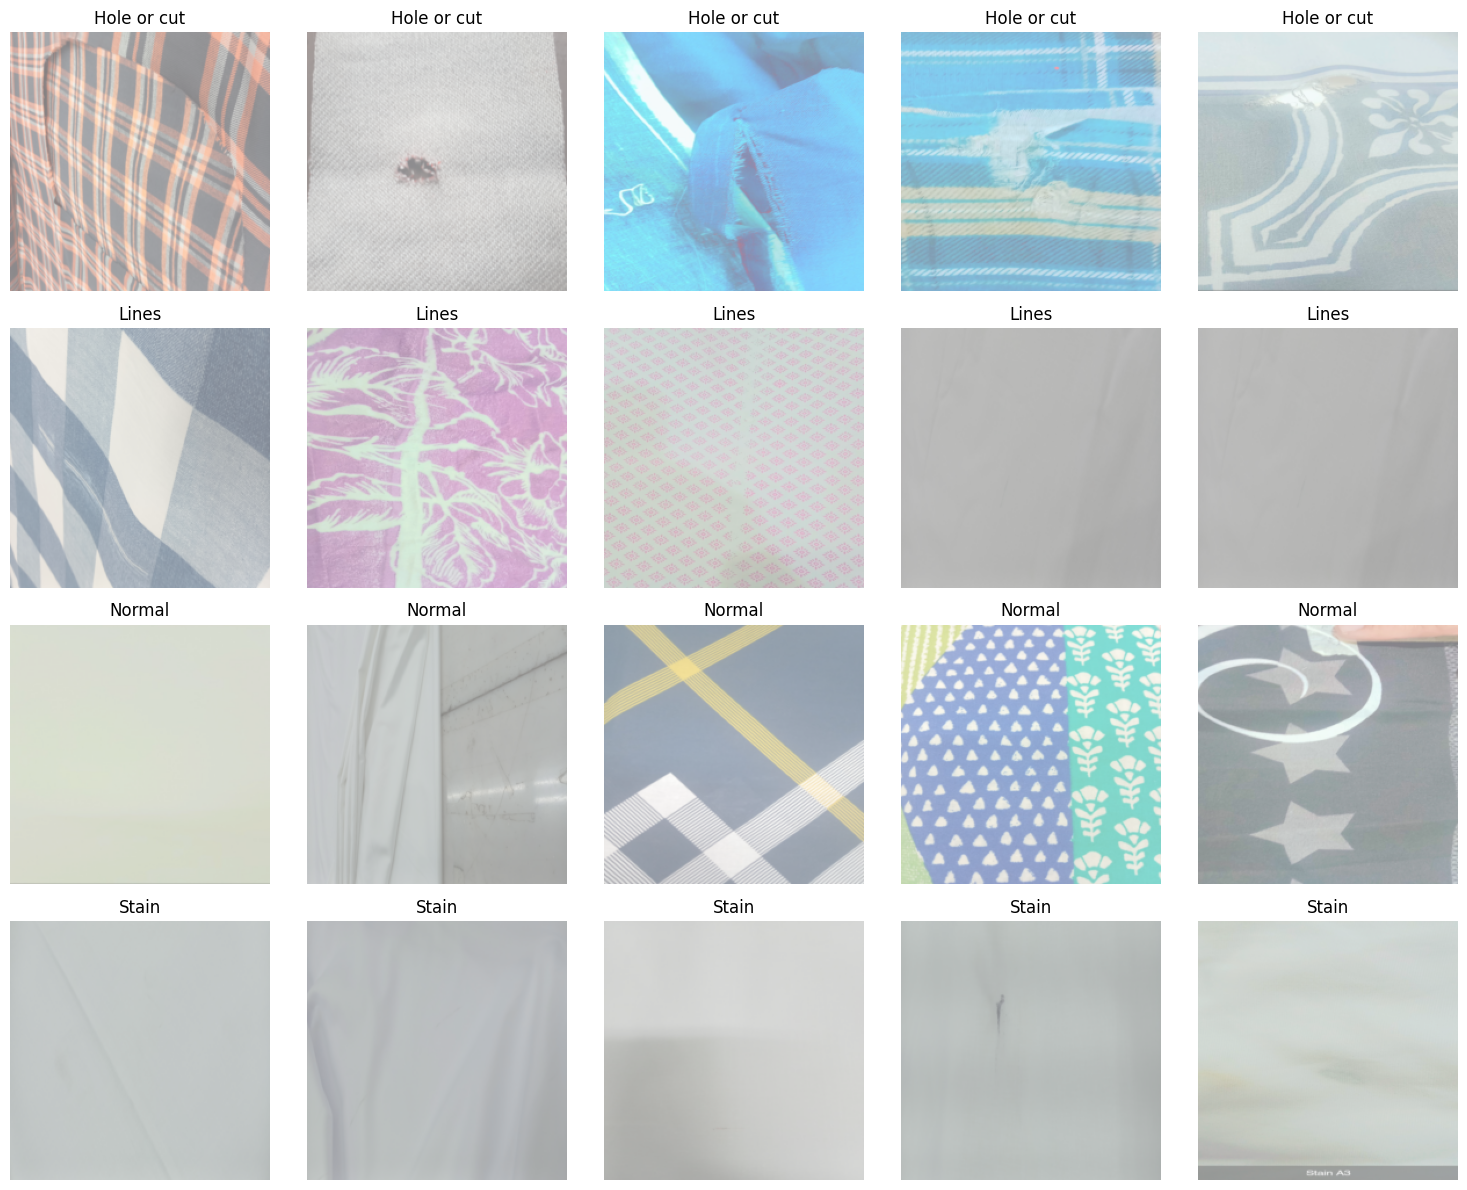

In [ ]:

import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image


# Get class names and their indices
class_names = dataset.classes
class_indices = {name: idx for idx, name in enumerate(class_names)}

# Prepare to visualize
def imshow(img, title, ax):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(title)
    ax.axis('off')

# Display 5 random images from each class
num_images_per_class = 5
fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(15, len(class_names) * 3))
for i, class_name in enumerate(class_names):
    # Filter images of the current class
    class_indices_list = [index for index, (_, label) in enumerate(dataset.samples) if label == class_indices[class_name]]

    for j in range(num_images_per_class):
        random_index = random.choice(class_indices_list)
        img_path, _ = dataset.samples[random_index]

        with Image.open(img_path) as img:
            img_tensor = transform(img)
            imshow(img_tensor, title=class_name, ax=axes[i, j])

plt.tight_layout()
plt.show()


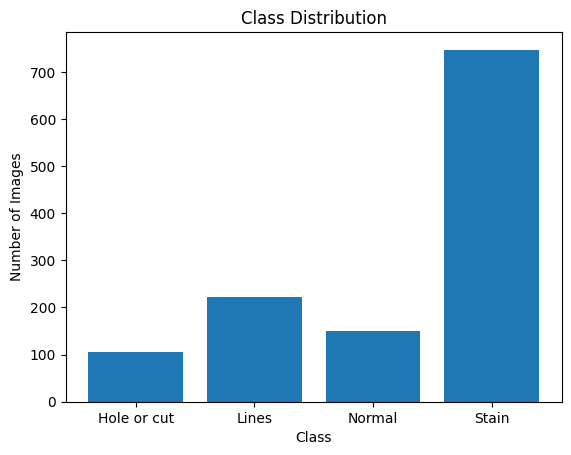

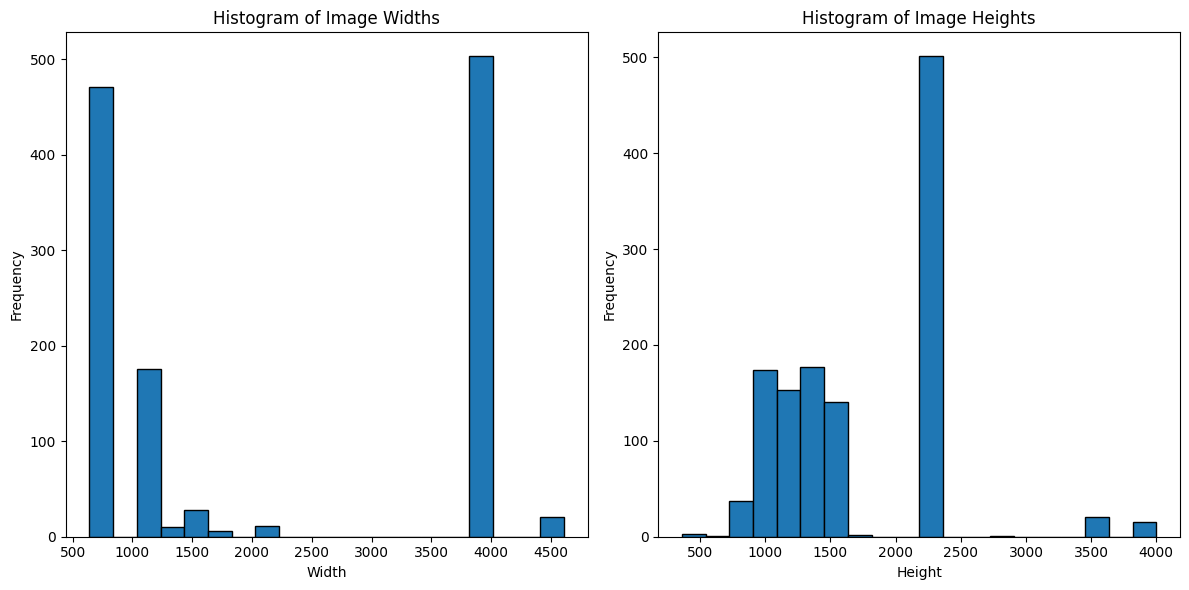

In [ ]:
import matplotlib.pyplot as plt

class_counts = {class_name: 0 for class_name in class_names}
for _, class_idx in dataset.samples:
    class_name = class_names[class_idx]
    class_counts[class_name] += 1

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

widths = []
heights = []
for img_path, _ in dataset.samples:
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, edgecolor='black')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Image Widths')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, edgecolor='black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Image Heights')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
means = []
stds = []
for img_path, _ in dataset.samples:
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        means.append(img_tensor.mean().item())
        stds.append(img_tensor.std().item())

print(f'Mean of pixel values: {np.mean(means)}')
print(f'Standard deviation of pixel values: {np.mean(stds)}')


Mean of pixel values: 0.5472356580307199
Standard deviation of pixel values: 0.1105529423415673


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.547], std=[0.111])  # Normalize with calculated mean and std
])


In [ ]:
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
import os
import pandas as pd
import shutil
from pathlib import Path

# Define paths and transformations
data_dir = '/content/drive/MyDrive/Newunzipt'
train_dir = '/content/drive/MyDrive/Train'
val_dir = '/content/drive/MyDrive/Val'

# Create directories if they don't exist
Path(train_dir).mkdir(parents=True, exist_ok=True)
Path(val_dir).mkdir(parents=True, exist_ok=True)

for class_name in class_names:
    Path(os.path.join(train_dir, class_name)).mkdir(parents=True, exist_ok=True)
    Path(os.path.join(val_dir, class_name)).mkdir(parents=True, exist_ok=True)

# Load dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Get image paths and labels
image_paths = [img_path for img_path, _ in dataset.samples]
labels = [label for _, label in dataset.samples]

# Split dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.3, stratify=labels, random_state=42
)

# Function to copy files to the new directory
def copy_files(file_paths, labels, dest_dir):
    for file_path, label in zip(file_paths, labels):
        class_name = class_names[label]
        dest_path = os.path.join(dest_dir, class_name)
        shutil.copy(file_path, dest_path)

# Copy files
copy_files(train_paths, train_labels, train_dir)
copy_files(val_paths, val_labels, val_dir)

print(f"Training images: {len(train_paths)}")
print(f"Validation images: {len(val_paths)}")


Training images: 858
Validation images: 368


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

Epoch 1/10, Loss: 1.0505
Validation Loss: 1.4791, Accuracy: 0.6440
Epoch 2/10, Loss: 0.8699
Validation Loss: 0.8278, Accuracy: 0.6821
Epoch 3/10, Loss: 0.7866
Validation Loss: 0.8964, Accuracy: 0.6712
Epoch 4/10, Loss: 0.7212
Validation Loss: 1.0262, Accuracy: 0.6902
Epoch 5/10, Loss: 0.7407
Validation Loss: 0.7567, Accuracy: 0.7065
Epoch 6/10, Loss: 0.6600
Validation Loss: 0.8609, Accuracy: 0.7147
Epoch 7/10, Loss: 0.6209
Validation Loss: 0.9453, Accuracy: 0.7228
Epoch 8/10, Loss: 0.6138
Validation Loss: 0.9713, Accuracy: 0.6766
Epoch 9/10, Loss: 0.5853
Validation Loss: 1.0535, Accuracy: 0.6549
Epoch 10/10, Loss: 0.5487
Validation Loss: 0.9069, Accuracy: 0.7228
              precision    recall  f1-score   support

 Hole or cut       0.47      0.25      0.33        32
       Lines       0.67      0.54      0.60        67
      Normal       0.46      0.27      0.34        45
       Stain       0.77      0.94      0.85       224

    accuracy                           0.72       368
   

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


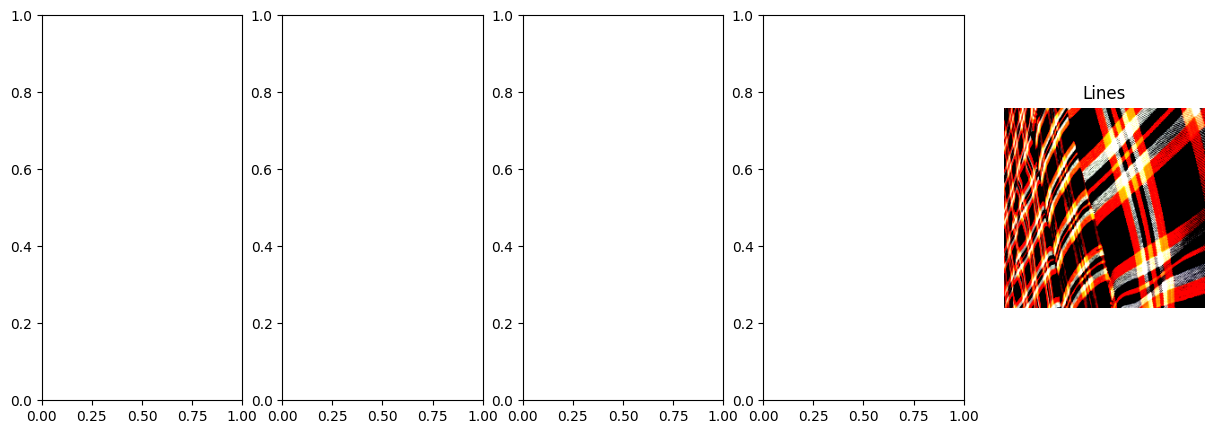

In [ ]:
import torch
from torchvision import datasets, transforms, models
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import shutil
from pathlib import Path
import random
from PIL import Image

# Define transforms for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resizing the images
    transforms.ToTensor(), # Converting to tensor
    transforms.Normalize(mean=[0.547], std=[0.111])  # Normalize with calculated mean and std
])

# Define paths
data_dir = '/content/drive/MyDrive/Newunzipt'
train_dir = '/content/drive/MyDrive/Train'
val_dir = '/content/drive/MyDrive/Val'

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # Adjust the final layer for the number of classes

# Move model to device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    corrects = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)

    val_loss /= len(val_loader.dataset)
    val_acc = corrects.double() / len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

# Predict on the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print(classification_report(all_labels, all_preds, target_names=val_dataset.classes))



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


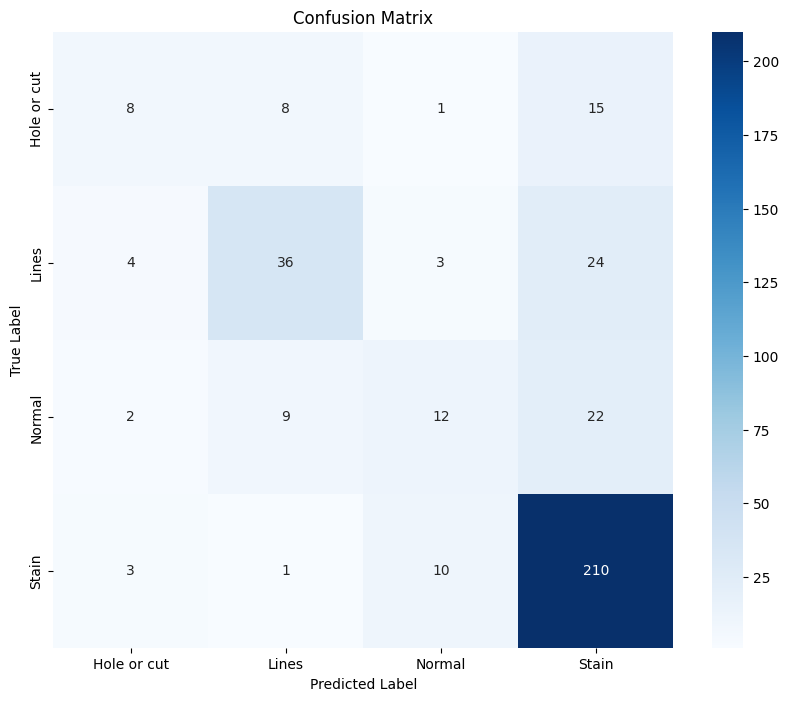

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.classes, yticklabels=val_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
